In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
data = np.loadtxt('ex03_solution.txt').T

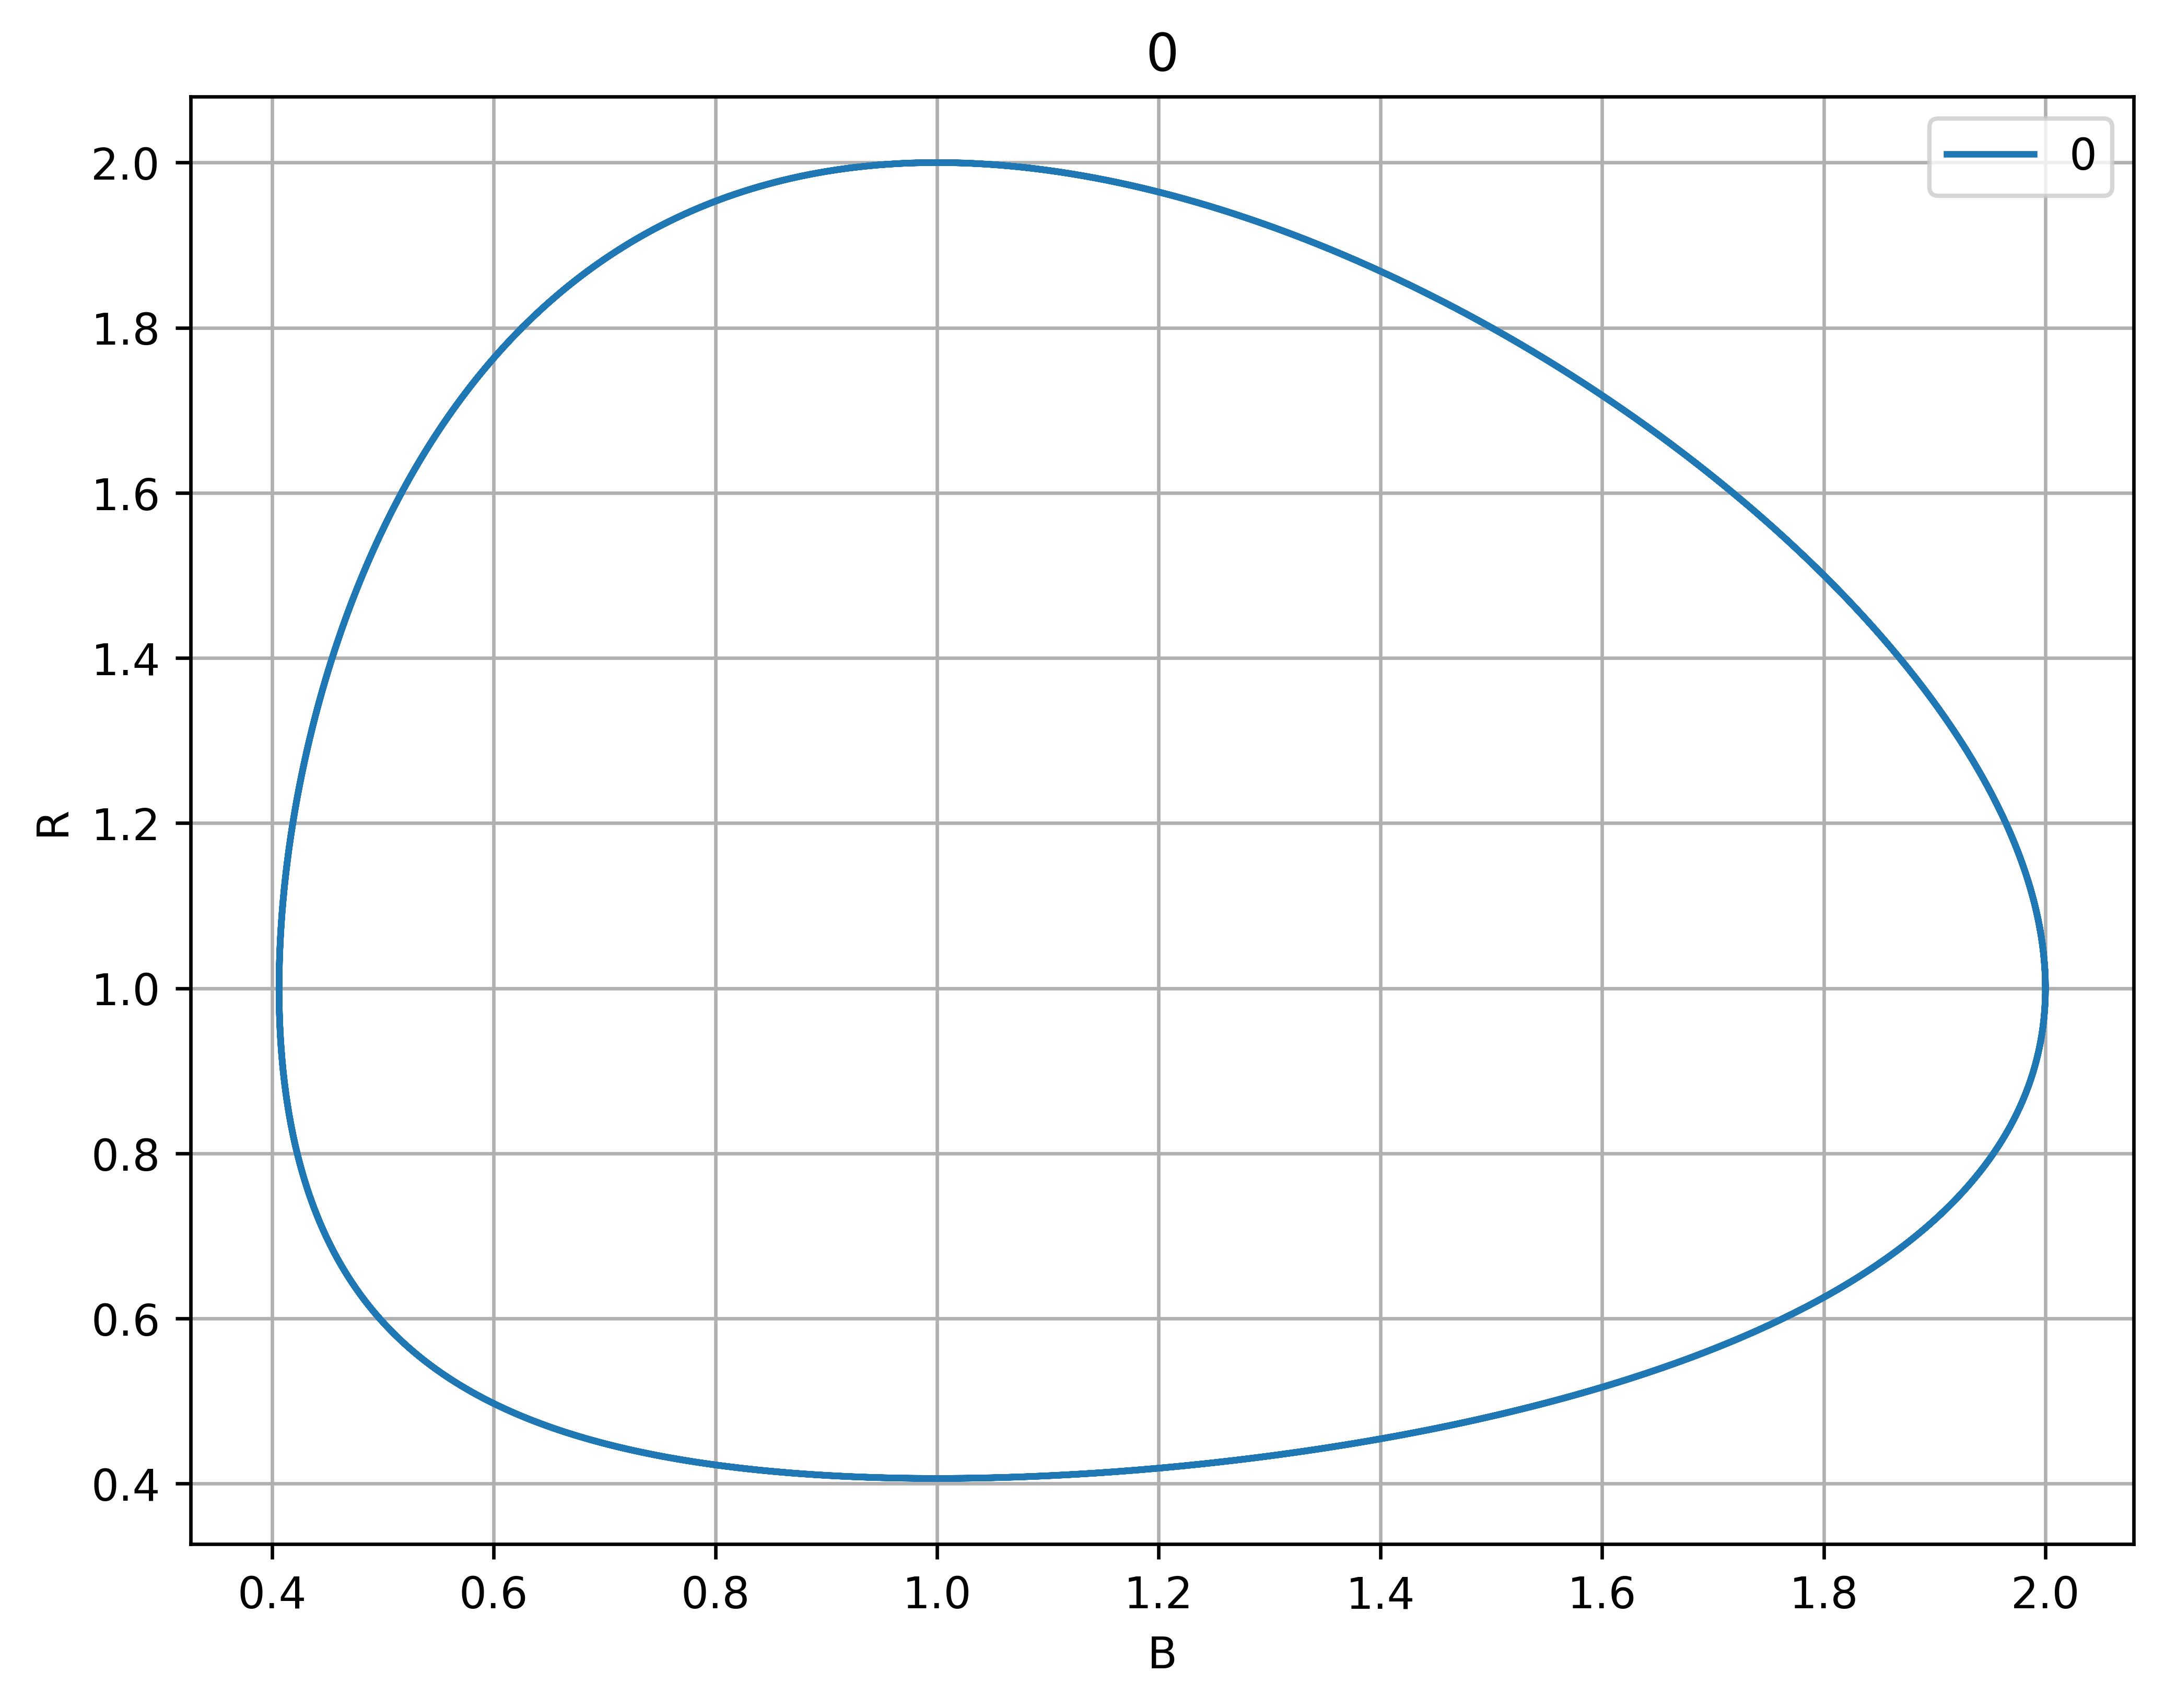

In [3]:
fig,ax=plt.subplots(figsize=(8, 6),dpi=600,constrained_layout=False)
ax.set_title('0')
ax.plot(data[1], data[2], label='$0$')
#ax.plot(data[0], data[2], label='$0$')
ax.set_xlabel('B')
ax.set_ylabel('R')
ax.grid()
ax.legend()

In [33]:
def ncr(n, k, q=1):
    if k>n:
        return 0
    elif q==1:
        num=1
        denom=1
        for i in range(1,k+1):
            num*=(n-i+1)
            denom*=i
        return num//denom
    else:
        num = 1
        denom = 1
        for i in range (k):
            num *= q**(n-i)-1
            denom *= q**(i+1)-1
        return num//denom

In [34]:
def f(t, v, k, lam):
    lmax = ncr(v-t, k-t)
    res = [lmax]
    for i in range(t+1):
        res.append((lam*ncr(v-i, k-i))/lmax)
    return res


In [35]:
f(5, 24, 8, 1)

[969, 759.0, 253.0, 77.0, 21.0, 5.0, 1.0]

In [36]:
f(5,11,6,1)

[6, 77.0, 42.0, 21.0, 9.333333333333334, 3.5, 1.0]

In [52]:
ncr(8,3)/ncr(4,3)

14.0

In [54]:
ncr(3,2,2)

7

In [40]:
def addv(v1, v2):
    return [(x+y)%2 for x, y in zip(v1, v2)]

In [42]:
addv([1,0,1], [1,1,0])

[0, 1, 1]

In [45]:
V=[[a,b,c] for a in [0,1] for b in [0,1] for c in [0,1]]

In [52]:
a11=sp.symbols('a_11')
a12=sp.symbols('a_12')
a13=sp.symbols('a_13')
a21=sp.symbols('a_21')
a22=sp.symbols('a_22')
a23=sp.symbols('a_23')
a31=sp.symbols('a_31')
a32=sp.symbols('a_32')
a33=sp.symbols('a_33')

sigma11=sp.symbols('sigma_11')
sigma12=sp.symbols('sigma_12')
sigma13=sp.symbols('sigma_13')
sigma21=sp.symbols('sigma_21')
sigma22=sp.symbols('sigma_22')
sigma23=sp.symbols('sigma_23')
sigma31=sp.symbols('sigma_31')
sigma32=sp.symbols('sigma_32')
sigma33=sp.symbols('sigma_33')

In [53]:
s=sp.Matrix([[sigma11,sigma12,sigma13],[sigma21,sigma22,sigma23],[sigma31,sigma32,sigma33]])
a=sp.Matrix([[a11,a12,a13],[a21,a22,a23],[a31,a32,a33]])

In [56]:
(a*s*(a.T)).trace()

a_11*(a_11*sigma_11 + a_12*sigma_21 + a_13*sigma_31) + a_12*(a_11*sigma_12 + a_12*sigma_22 + a_13*sigma_32) + a_13*(a_11*sigma_13 + a_12*sigma_23 + a_13*sigma_33) + a_21*(a_21*sigma_11 + a_22*sigma_21 + a_23*sigma_31) + a_22*(a_21*sigma_12 + a_22*sigma_22 + a_23*sigma_32) + a_23*(a_21*sigma_13 + a_22*sigma_23 + a_23*sigma_33) + a_31*(a_31*sigma_11 + a_32*sigma_21 + a_33*sigma_31) + a_32*(a_31*sigma_12 + a_32*sigma_22 + a_33*sigma_32) + a_33*(a_31*sigma_13 + a_32*sigma_23 + a_33*sigma_33)

In [55]:
(a*s*(a.T))[0,0].simplify()

a_11*(a_11*sigma_11 + a_12*sigma_21 + a_13*sigma_31) + a_12*(a_11*sigma_12 + a_12*sigma_22 + a_13*sigma_32) + a_13*(a_11*sigma_13 + a_12*sigma_23 + a_13*sigma_33)

In [41]:
a*s

Matrix([
[a_11*sigma_11 + a_12*sigma_21 + a_13*sigma_31, a_11*sigma_12 + a_12*sigma_22 + a_13*sigma_32, a_11*sigma_12 + a_12*sigma_23 + a_13*sigma_33],
[a_21*sigma_11 + a_22*sigma_21 + a_23*sigma_31, a_21*sigma_12 + a_22*sigma_22 + a_23*sigma_32, a_21*sigma_12 + a_22*sigma_23 + a_23*sigma_33],
[a_31*sigma_11 + a_32*sigma_21 + a_33*sigma_31, a_31*sigma_12 + a_32*sigma_22 + a_33*sigma_32, a_31*sigma_12 + a_32*sigma_23 + a_33*sigma_33]])